In [16]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.imagenet_utils import preprocess_input, decode_predictions
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.imagenet_utils import preprocess_input, decode_predictions
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# Load the four pre-trained models
model1 = load_model('custom1_model.keras') #224x224x3
model2 = load_model('custom2_model.keras') #grey 48x48x1
model3 = load_model('resnet50.keras') #224x224x3
model4 = load_model('EFV2.keras') #224x224x3

In [4]:
path = '/FGD/Acadamics and University/Python/Intelligent Systems/Project/Models/Test/'
pic = 5
img_dir = path + str(pic) + '.jpg'

test_dir = '/FGD/Acadamics and University/Python/Intelligent Systems/Project/rescal224 - split/test'


In [5]:
cl = {0: 'Angry', 1: 'Happy', 2: 'Neutral', 3: 'Sad', 4: 'Surprise'}

In [20]:
def avg_pred_dir(pic):
    # Preprocess the image
    img_dir = path + str(pic) + '.jpg'
    img_c = tf.keras.preprocessing.image.load_img(img_dir, target_size=(224, 224,3))
    x_c = tf.keras.preprocessing.image.img_to_array(img_c)
    x_c = np.expand_dims(x_c, axis=0)
    x_c = x_c/255.0

    print('Input image shape:', x_c.shape)

    img_g = Image.open(img_dir) # Convert to grayscale
    img_g = img_g.convert('L')  # Convert to grayscale\
    img_g = img_g.resize((48, 48))

    x_g = tf.keras.preprocessing.image.img_to_array(img_g)
    x_g = np.expand_dims(x_g, axis=0)
    x_g = x_g/255.0
    
    # Get predictions from each model
    pred1 = model1.predict(x_c)
    # print(len(pred1[0]))
    pred2 = model2.predict(x_g)
    # print(len(pred2[0]))
    pred3 = model3.predict(x_c)
    # print(len(pred3[0]))
    pred4 = model4.predict(x_c)
    # print(len(pred4[0]))
    
    # Average the predictions
    avg_pred = (pred1 + pred2 + pred3 + pred4 ) / 4
    final = np.argmax(avg_pred)
    print("Class: ",final,cl[final])
    display(img_c)

    print('Input image shape:', x_g.shape)
    
    return avg_pred, final    


In [21]:
# # Average the predictions (1 pic):
# # Get predictions from each model
# pred1 = model1.predict(x_c)
# print(np.argmax(avg_pred))
# pred2 = model2.predict(x_g)
# print(np.argmax(avg_pred))
# pred3 = model3.predict(x_c)
# print(np.argmax(avg_pred))
# pred4 = model4.predict(x_c)
# print(np.argmax(avg_pred))
# avg_pred(1)

# avg_pred = (pred1 + pred2 + pred3 + pred4 ) / 4
# final = np.argmax(avg_pred)
# print("Class: ",final,cl[final])
# display(img_c)

Input image shape: (1, 224, 224, 3)
1/1 [==============================] - 0s 54ms/step
Class:  2 Neutral


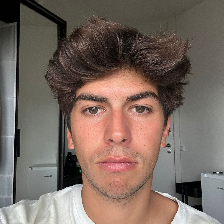

Input image shape: (1, 48, 48, 1)
Input image shape: (1, 224, 224, 3)
1/1 [==============================] - 0s 64ms/step
Class:  3 Sad


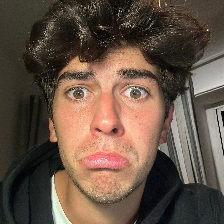

Input image shape: (1, 48, 48, 1)
Input image shape: (1, 224, 224, 3)
1/1 [==============================] - 0s 53ms/step
Class:  1 Happy


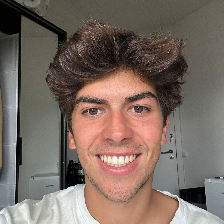

Input image shape: (1, 48, 48, 1)
Input image shape: (1, 224, 224, 3)
1/1 [==============================] - 0s 52ms/step
Class:  2 Neutral


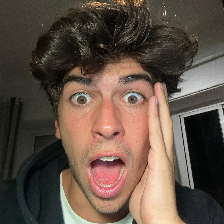

Input image shape: (1, 48, 48, 1)
Input image shape: (1, 224, 224, 3)
1/1 [==============================] - 0s 56ms/step
Class:  0 Angry


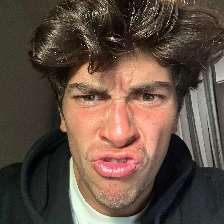

Input image shape: (1, 48, 48, 1)
Input image shape: (1, 224, 224, 3)
1/1 [==============================] - 0s 58ms/step
Class:  1 Happy


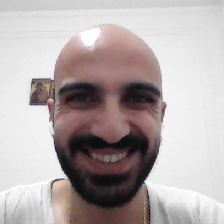

Input image shape: (1, 48, 48, 1)
Input image shape: (1, 224, 224, 3)
1/1 [==============================] - 0s 67ms/step
Class:  3 Sad


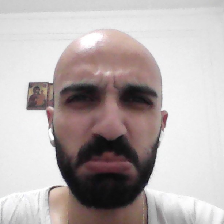

Input image shape: (1, 48, 48, 1)
Input image shape: (1, 224, 224, 3)
1/1 [==============================] - 0s 61ms/step
Class:  0 Angry


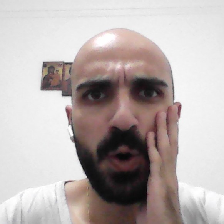

Input image shape: (1, 48, 48, 1)
Input image shape: (1, 224, 224, 3)
1/1 [==============================] - 0s 53ms/step
Class:  0 Angry


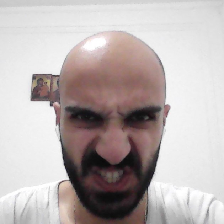

Input image shape: (1, 48, 48, 1)
Input image shape: (1, 224, 224, 3)
1/1 [==============================] - 0s 62ms/step
Class:  2 Neutral


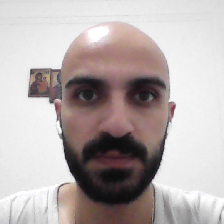

Input image shape: (1, 48, 48, 1)


In [22]:
for i in range(1,11):
    avg_pred_dir(i)

In [9]:
test_datagen = ImageDataGenerator(rescale=1./255)
# Load test data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=1,
    class_mode='categorical'
)

emotion_labels = {v: k for k, v in test_generator.class_indices.items()}
print(emotion_labels)

Found 2141 images belonging to 5 classes.
{0: 'Angry', 1: 'Happy', 2: 'Neutral', 3: 'Sad', 4: 'Surprise'}


In [14]:

# Function to get averaged predictions across models for a given image batch
def avg_pred_image(x_c, x_g):
    # Get predictions from each model
    pred1 = model1.predict(x_c,verbose=0)
    pred2 = model2.predict(x_g,verbose=0)
    pred3 = model3.predict(x_c,verbose=0)
    pred4 = model4.predict(x_c,verbose=0)
    
    # Average the predictions
    avg_pred = (pred1 + pred2 + pred3 + pred4) / 4
    return avg_pred

# Initialize variables to store correct predictions and total samples
true_labels = []
predicted_labels = []

correct_predictions = 0
total_samples = 0

# Iterate over the test generator
for i in range(len(test_generator)):
    x_batch, y_true_batch = test_generator[i]  # Load batch from generator
    x_c = x_batch  # For color models, resize to 224x224
    x_g = tf.image.resize(tf.image.rgb_to_grayscale(x_c), [48, 48])  # Grayscale resized to 48x48
    
    # Get average prediction
    avg_pred = avg_pred_image(x_c, x_g)
    predicted_class = np.argmax(avg_pred, axis=1)
    true_class = np.argmax(y_true_batch, axis=1)
    
    # Append results to lists
    predicted_labels.extend(predicted_class)
    true_labels.extend(true_class)
    
    # Check if prediction is correct
    correct_predictions += np.sum(predicted_class == true_class)
    total_samples += y_true_batch.shape[0]

Accuracy on test set: 91.13%


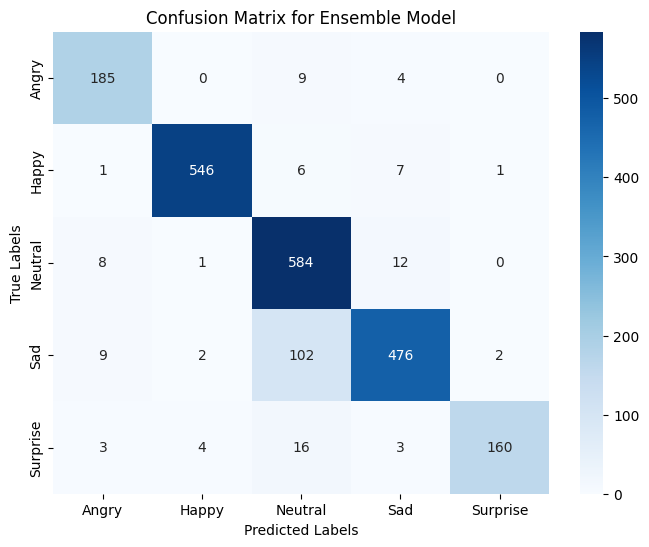

In [17]:

# Calculate accuracy
accuracy = correct_predictions / total_samples
print(f"Accuracy on test set: {accuracy * 100:.2f}%")
# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=list(cl.values()), yticklabels=list(cl.values()))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Ensemble Model")
plt.show()
